In [2]:
import numpy as np
import matplotlib.pyplot as plt

Inicializo las capas

In [48]:
# Capa 1
W11=np.random.rand(1)
W21=np.random.rand(1)
W31=np.random.rand(1)
W41=np.random.rand(1)
B11=np.random.rand(1)
B12=np.random.rand(1)

# Capa 2
W12=np.random.rand(1)
W22=np.random.rand(1)
B21=np.random.rand(1)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0])

mse_historic = []

In [49]:
# Y1 = sigmoidea (Z1)
# Y2 = sigmoidea (Z2)
# Z1 = X11 * W11 + X21 * W21 + B11
# Z2 = X11 * W31 + X21 * W41 + B12

def sigmoid(self,v):
    return np.array(1/(1+np.exp(-v)))

lr=0.07
epochs = 9000
for a in range(epochs):
    errors=[]
    for i in range(len(X)):
        # Fordward
        z1_1 = (X[i,0] * W11) + (X[i,1] * W21) + B11
        z1_2 = (X[i,0] * W31) + (X[i,1] * W41) + B12 
        a_1 = 1 / (1 + np.exp(-z1_1))
        a_2 = 1 / (1 + np.exp(-z1_2))
        yhat = (a_1 * W12) + (a_2 * W22) + B21
        #definir el error
        error = (yhat - Y[i])
        Loss = 1 #(1/len(X)) * np.power(error,2)
        #Backward
        #calcular derivada
        dLoss_derror = 1 #2/len(X) * (error)
        derror_Yhat = yhat - Y[i]
        dYhat_da1 = W12
        dYhat_da2 = W22
        dYhat_dW12 = a_1
        dYhat_dW22 = a_2
        dz11_dB11 = 1
        dz12_dB12 = 1
        dYhat_dB21 = 1

        dz11_dW11 = X[i,0]
        dz11_dW21 = X[i,1]
        dz12_dW31 = X[i,0]
        dz12_dW41 = X[i,1]

        da1_dz11 = a_1*(1-a_1) 
        da2_dz12 = a_2*(1-a_2) 

        dLoss_dW12 = dLoss_derror * derror_Yhat * dYhat_dW12
        dLoss_dW22 = dLoss_derror * derror_Yhat * dYhat_dW22
        dLoss_dB21 = dLoss_derror * derror_Yhat * dYhat_dB21

        dLoss_dw11 = dLoss_derror * derror_Yhat * dYhat_da1 * da1_dz11 * dz11_dW11    
        dLoss_dw21 = dLoss_derror * derror_Yhat * dYhat_da1 * da1_dz11 * dz11_dW21
        dLoss_dB11 = dLoss_derror * derror_Yhat * dYhat_da1 * da1_dz11 * dz11_dB11

        dLoss_dw31 = dLoss_derror * derror_Yhat * dYhat_da2 * da2_dz12 * dz12_dW31
        dLoss_dw41 = dLoss_derror * derror_Yhat * dYhat_da2 * da2_dz12 * dz12_dW41
        dLoss_dB12 = dLoss_derror * derror_Yhat * dYhat_da2 * da2_dz12 * dz12_dB12

        W11 = W11 - (lr * dLoss_dw11)
        W21 = W21 - (lr * dLoss_dw21)
        B11 = B11 - (lr * dLoss_dB11)

        W31 = W31 - (lr * dLoss_dw31)
        W41 = W41 - (lr * dLoss_dw41)
        B12 = B12 - (lr * dLoss_dB12)

        W12 = W12 - (lr * dLoss_dW12)
        W22 = W22 - (lr * dLoss_dW22)
        B21 = B21 - (lr * dLoss_dB21)

    mse = 1/4 * (np.sum(error))
    mse_historic.append(mse)
    if(a % 20 == 0):
        print(f"mse on epoch {a} is {mse:5.3f}")

mse on epoch 0 is 0.184
mse on epoch 20 is 0.160
mse on epoch 40 is 0.160
mse on epoch 60 is 0.159
mse on epoch 80 is 0.159
mse on epoch 100 is 0.159
mse on epoch 120 is 0.159
mse on epoch 140 is 0.158
mse on epoch 160 is 0.158
mse on epoch 180 is 0.158
mse on epoch 200 is 0.158
mse on epoch 220 is 0.158
mse on epoch 240 is 0.158
mse on epoch 260 is 0.157
mse on epoch 280 is 0.157
mse on epoch 300 is 0.157
mse on epoch 320 is 0.157
mse on epoch 340 is 0.157
mse on epoch 360 is 0.157
mse on epoch 380 is 0.157
mse on epoch 400 is 0.157
mse on epoch 420 is 0.156
mse on epoch 440 is 0.156
mse on epoch 460 is 0.156
mse on epoch 480 is 0.156
mse on epoch 500 is 0.156
mse on epoch 520 is 0.156
mse on epoch 540 is 0.156
mse on epoch 560 is 0.156
mse on epoch 580 is 0.156
mse on epoch 600 is 0.156
mse on epoch 620 is 0.156
mse on epoch 640 is 0.155
mse on epoch 660 is 0.155
mse on epoch 680 is 0.155
mse on epoch 700 is 0.155
mse on epoch 720 is 0.155
mse on epoch 740 is 0.155
mse on epoch 760 i

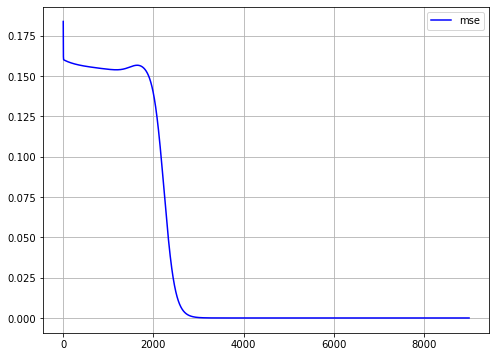

In [50]:
plt.figure(figsize=(8,6))
plt.plot(mse_historic, color='blue', label='mse')
plt.grid(True)
plt.legend()
plt.show()

In [51]:
print("W11 = ", float(W11))
print("W21 = ", float(W21))
print("B11 = ", float(B11))
print("W31 = ", float(W31))
print("W41 = ", float(W41))
print("B12 = ", float(B12))
print("W12 = ", float(W12))
print("W22 = ", float(W22))
print("B21 = ", float(B21))

W11 =  3.377877528698412
W21 =  3.259694351732672
B11 =  -0.6387521823647242
W31 =  1.543867592140681
W41 =  1.5146745511535737
B12 =  -2.1677072231186343
W12 =  3.039308360193645
W22 =  -3.2679751872097236
B21 =  -0.7145859801751704


In [59]:
for i in range(len(X)):
        z1_1 = (X[i,0] * W11) + (X[i,1] * W21) + B11
        z1_2 = (X[i,0] * W31) + (X[i,1] * W41) + B12 
        a_1 = 1 / (1 + np.exp(-z1_1))
        a_2 = 1 / (1 + np.exp(-z1_2))
        yhat = (a_1 * W12) + (a_2 * W22) + B21
        if float(yhat)<1e-10:
                yhat = 0
        if float(yhat)>0.99999999999:
                yhat = 1
        print("yhat {} = ".format(i),int(yhat))

yhat 0 =  0
yhat 1 =  1
yhat 2 =  1
yhat 3 =  0
